In [1]:
# ---------------------------------------------------------------------
# Arquivo	: notebook.ipynb
# Conteúdo	: Extração, Processamento e Visualização de Dados da Disciplina de Mecânica das Rochas (DEMIN/UFMG)
# Autor	    : Gustavo Augusto Ortiz de Oliveira (gstvortiz@hotmail.com)
# Histórico	: 
    # 2023-10-05 - arquivo criado
# ------------------------------------------------------------------------

# Esse é um notebook criado para ajudar meu amigo Pedro, no processamento de dados gerados durante ensaios realizados no Laboratório 
# de Mecânica das Rochas no Departamento de Engenharia de Minas da UFMG.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
np.set_printoptions(suppress=True, precision=3)

In [3]:
def findIdxCol(df, key, first):
    idx, col = None, None
    for index, row in df.iterrows():
        for column, data in enumerate(row):
            if data == key and first:
                return index, column
            elif data == key:
                idx, col = index, column 
    return idx, col

def cutString(df, idx, col):
    s = df.iloc[idx:, col]
    idxmax = s[s.isna()].index[0]
    s = df.iloc[idx+1:idxmax, col]
    return s.astype(float)

def RegressaoLinear(data, colX, colY):
    data['1'] = 1
    a, b = np.linalg.pinv(data[[colX, '1']]).dot(data[colY])
    return a, b

(11.762410261908375, 182.33254560759704, 57.48916131865525, 26.581901117205216)

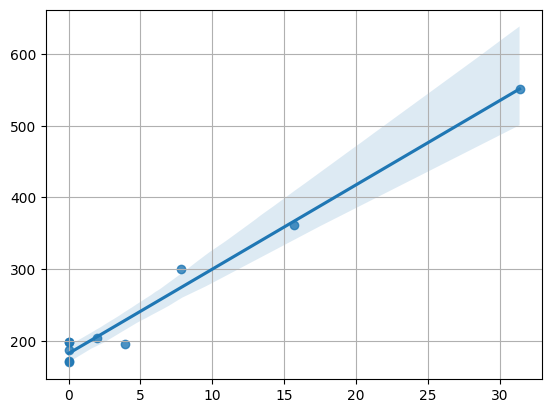

In [4]:
data = []

for i in [1, 2, 3, 4, 5]:
    df = pd.read_excel(f'ensaio uniaxial/uniaxial-{i}.xls')
    idx, col = findIdxCol(df, 'MPa', False)
    s = cutString(df, idx, col)
    data.append([s.max().round(2), 0])

for i in [20, 40, 80, 160, 320]:
    df = pd.read_excel(f'ensaio triaxial/triaxial-{i}.xls')
    idx, col = findIdxCol(df, 'MPa', False)
    s = cutString(df, idx, col)
    data.append([s.max().round(2), round(i/10.197, 2)])

ax = sns.regplot(x = [d[1] for d in data], y = [d[0] for d in data])
plt.grid()

a, b = RegressaoLinear(pd.DataFrame(data), 1, 0)
phi = math.asin((a-1)/(1+a))
C = (1+math.sin(phi))*b/(a*2*math.cos(phi))
a, b, math.degrees(phi), C

-0.3474648817648537


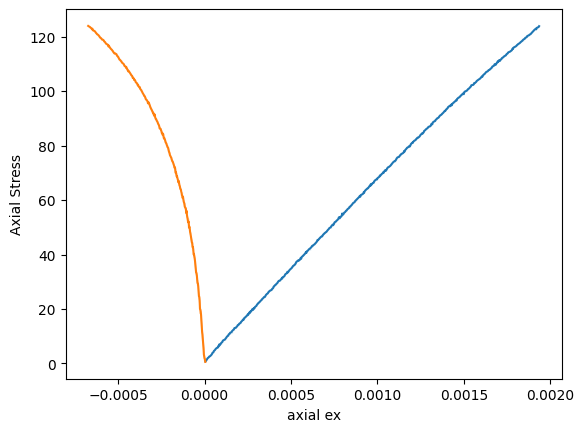

-0.36407878455026527


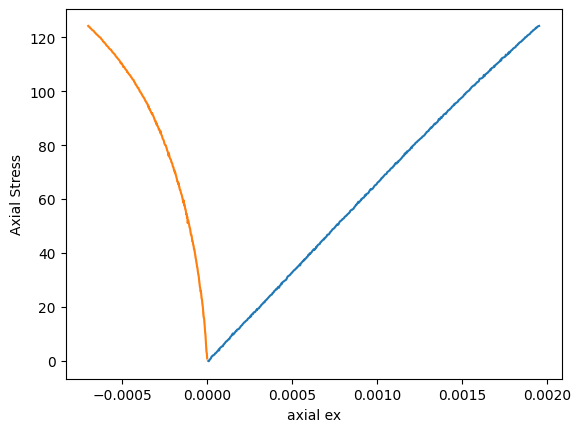

-0.46627472412454346


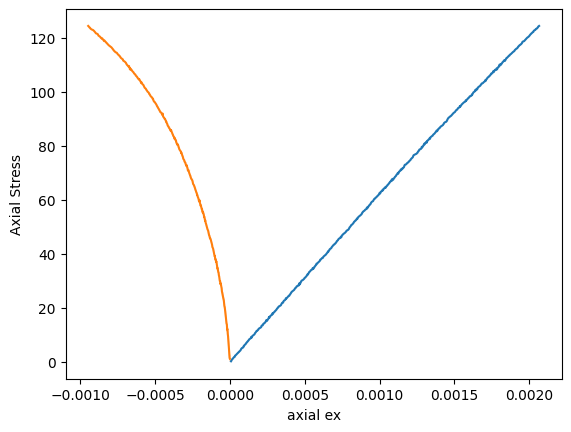

-0.4445881198247298


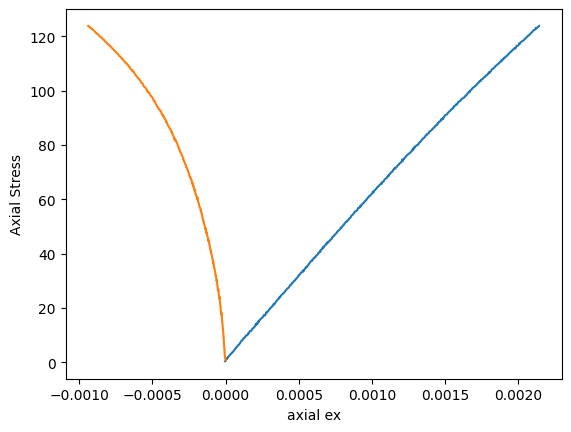

In [5]:
for i in [2, 3, 4, 5]:
    df = pd.read_excel(f'ensaio uniaxial/uniaxial-{i}.xls')
    data = pd.DataFrame()
    for coluna in ['axial ex', 'circ strain', 'Axial Stress', 'segments']:
        idx, col = findIdxCol(df, coluna, True)
        s = cutString(df, idx+1, col)
        data[coluna] = s
    data = data.query('segments == 0')
    ax = sns.lineplot(data = data, x = 'axial ex', y = 'Axial Stress')
    ax = sns.lineplot(data  = data, x = 'circ strain', y = 'Axial Stress')

    data = data[(data['Axial Stress'] > 11) & (data['Axial Stress'] < 120)]
    a1, b1 = RegressaoLinear(data, 'axial ex', 'Axial Stress')
    a2, b2 = RegressaoLinear(data, 'circ strain', 'Axial Stress')
    print(a1/a2)
    plt.show()